## ML - Live demo with Sklearn

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Synthetic data
- Patient data with two variables: age and weight
- Labeled into sick and healthy

In [42]:
positive = np.random.randn(1000,2)
positive *= 2
positive[:,0] += 5
positive[:,1] -= 5

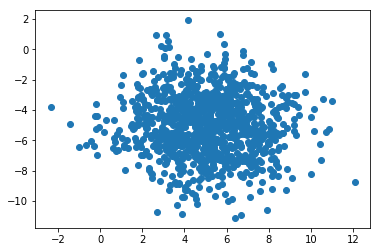

In [43]:
x = positive[:,0]
y = positive[:,1]
plt.scatter(x,y)

## Add negative examples

In [44]:
negative = np.random.randn(1000,2)
X = np.vstack([positive, negative])
X.shape

(2000, 2)

## Add synthetic labels

In [47]:
Y = np.vstack([np.ones((1000,1)),-1*np.ones((1000,1))])
data = np.hstack([X, Y])
data[:5]

array([[ 3.17660554, -1.94470133,  1.        ],
       [ 6.04969495, -7.33882623,  1.        ],
       [ 5.59327686, -9.00040269,  1.        ],
       [ 6.61579019, -8.21223316,  1.        ],
       [ 5.2636487 , -5.68448254,  1.        ]])

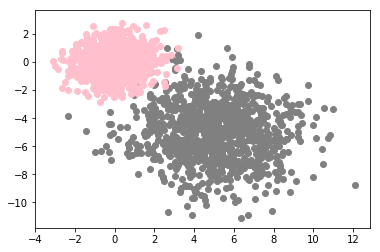

In [48]:
plt.scatter(positive[:,0], positive[:,1], c='gray')
plt.scatter(negative[:,0], negative[:,1], c='pink')

## Shuffle order of rows

In [49]:
np.random.shuffle(data)

## Sklearn

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
reg = LogisticRegression()

## Train a logistic regression model

In [52]:
X = data[:,:-1]
Y = data[:,-1]
reg.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [53]:
reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

The weights can be accessed like so:

In [54]:
a,b = reg.coef_[0]
c = reg.intercept_[0]
(a,b,c)

(1.8506276730952045, -1.6560461417024357, -5.936925596441622)

## Visualize

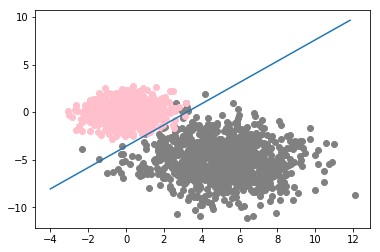

In [55]:
plt.scatter(positive[:,0], positive[:,1], c='gray')
plt.scatter(negative[:,0], negative[:,1], c='pink')
ticks = [-4 + 0.16*t for t in range(100)]
boundary_y = [-(a*x + c)/b for x in ticks]
boundary_y = [b if b < 15 else 15 for b in boundary_y]
boundary_y = [b if b > -15 else -15 for b in boundary_y]
plt.plot(ticks, boundary_y)

## Predict and Evaluate the training error

In [56]:
pred = reg.predict(X)
(pred == Y).sum()/2000

0.991

## Evaluate test error with cross validation

In [57]:
from sklearn.model_selection import cross_val_score

In [58]:
reg = LogisticRegression()
cross_val_score(reg, X, Y, scoring='accuracy', cv=5)

array([0.99  , 0.995 , 0.985 , 0.9925, 0.99  ])

## Learning Curve

In [59]:
from sklearn.model_selection import learning_curve

In [60]:
sizes, train_scores, test_scores = learning_curve(LogisticRegression(), X, Y, cv=5, scoring='neg_log_loss', train_sizes=np.linspace(0.1,1.0,200))

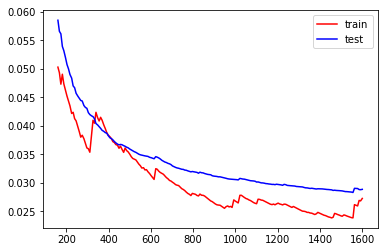

In [61]:
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.plot(sizes, -train_scores_mean, c='red', label='train')
plt.plot(sizes, -test_scores_mean, c='blue', label='test')
plt.legend()

## Gridsearch

In [62]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
import pandas as pd

iris = datasets.load_iris()

parameters = [{'kernel':['poly'], 'degree':[1, 2,3]}, {'kernel': ['rbf'], 'C': [1,10]}, {'kernel': ['linear'], 'C': [1,10], 'gamma': [0.1,1]}]
svc = svm.SVC()
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(iris.data, iris.target)
df = pd.DataFrame(clf.cv_results_)
df.sort_values('mean_test_score', ascending=False, inplace=True)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_degree,param_kernel,param_C,param_gamma,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000386,0.000118,0.000188,2.713911e-05,1,poly,NaN,NaN,"{'degree': 1, 'kernel': 'poly'}",0.966667,...,0.980000,0.016330,1,0.966667,0.975000,0.991667,0.983333,0.966667,0.976667,0.009718
3,0.000412,0.000034,0.000193,3.753632e-05,NaN,rbf,1,NaN,"{'C': 1, 'kernel': 'rbf'}",0.966667,...,0.980000,0.016330,1,0.983333,0.983333,0.991667,0.983333,0.975000,0.983333,0.005270
4,0.000361,0.000034,0.000170,2.869775e-05,NaN,rbf,10,NaN,"{'C': 10, 'kernel': 'rbf'}",0.966667,...,0.980000,0.016330,1,0.975000,0.966667,0.991667,0.983333,0.966667,0.976667,0.009718
5,0.000276,0.000037,0.000136,1.114208e-06,NaN,linear,1,0.1,"{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}",0.966667,...,0.980000,0.016330,1,0.975000,0.975000,0.991667,0.983333,0.983333,0.981667,0.006236
6,0.000262,0.000015,0.000135,6.675720e-07,NaN,linear,1,1,"{'C': 1, 'gamma': 1, 'kernel': 'linear'}",0.966667,...,0.980000,0.016330,1,0.975000,0.975000,0.991667,0.983333,0.983333,0.981667,0.006236
1,0.000373,0.000074,0.000157,1.148435e-05,2,poly,NaN,NaN,"{'degree': 2, 'kernel': 'poly'}",1.000000,...,0.973333,0.038873,6,0.966667,0.966667,0.991667,0.991667,0.983333,0.980000,0.011304
7,0.000278,0.000038,0.000150,3.432446e-05,NaN,linear,10,0.1,"{'C': 10, 'gamma': 0.1, 'kernel': 'linear'}",1.000000,...,0.973333,0.038873,6,0.966667,0.966667,0.991667,0.991667,0.975000,0.978333,0.011304
8,0.000278,0.000018,0.000144,2.065503e-05,NaN,linear,10,1,"{'C': 10, 'gamma': 1, 'kernel': 'linear'}",1.000000,...,0.973333,0.038873,6,0.966667,0.966667,0.991667,0.991667,0.975000,0.978333,0.011304
2,0.001331,0.000986,0.000167,2.699859e-05,3,poly,NaN,NaN,"{'degree': 3, 'kernel': 'poly'}",1.000000,...,0.966667,0.042164,9,0.975000,0.975000,0.991667,1.000000,0.975000,0.983333,0.010541
